In [1]:
import pandas as pd
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [4]:
benin_clean = pd.read_csv('../data/benin_clean.csv')
togo_clean = pd.read_csv('../data/togo_clean.csv')
ser_clean = pd.read_csv('../data/sierraleone_clean.csv')

In [9]:
benin = benin_clean[['GHI', 'DNI', 'DHI' ]]
togo = togo_clean[['GHI', 'DNI', 'DHI' ]]
ser = ser_clean[['GHI', 'DNI', 'DHI' ]]

In [11]:
ser

,GHI,DNI,DHI
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0
...,...,...,...
504372,0.0,0.0,0.0
504373,0.0,0.0,0.0
504374,0.0,0.0,0.0
504375,0.0,0.0,0.0


In [12]:
# Add country column
benin['Country'] = 'Benin'
ser['Country'] = 'Sierra Leone'
togo['Country'] = 'Togo'

/tmp/ipykernel_9582/1307367779.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  benin['Country'] = 'Benin'
/tmp/ipykernel_9582/1307367779.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ser['Country'] = 'Sierra Leone'
/tmp/ipykernel_9582/1307367779.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

In [14]:
df = pd.concat([benin, togo, ser], ignore_index=True)

In [15]:
df

,GHI,DNI,DHI,Country
0,0.0,0.0,0.0,Benin
1,0.0,0.0,0.0,Benin
2,0.0,0.0,0.0,Benin
3,0.0,0.0,0.0,Benin
4,0.0,0.0,0.0,Benin
...,...,...,...,...
1538422,0.0,0.0,0.0,Sierra Leone
1538423,0.0,0.0,0.0,Sierra Leone
1538424,0.0,0.0,0.0,Sierra Leone
1538425,0.0,0.0,0.0,Sierra Leone


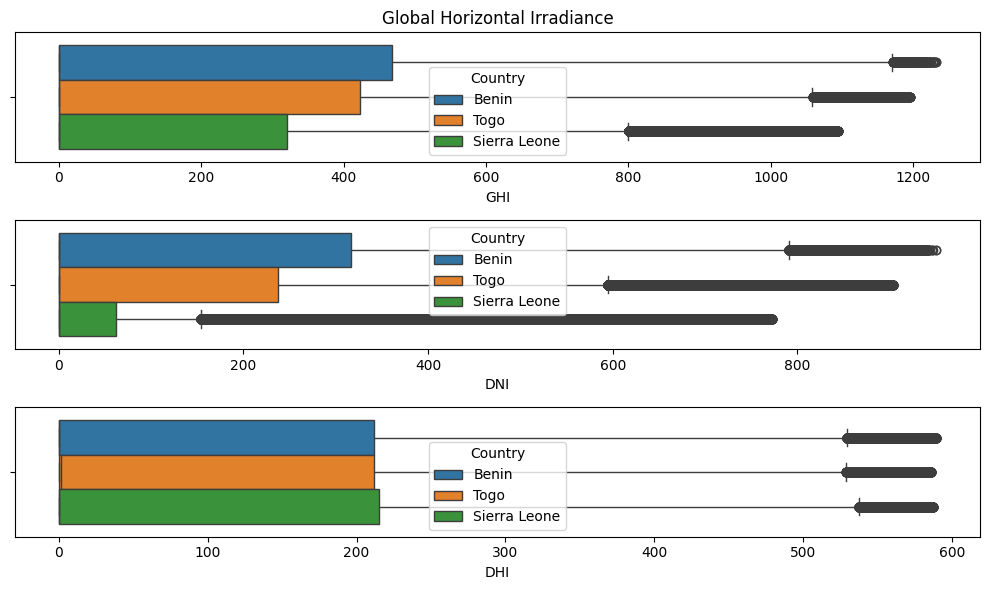

In [17]:
plt.figure(figsize=(10, 6))
plt.subplot(3, 1, 1)
sns.boxplot(x='GHI', data=df, hue='Country' )
plt.title('Global Horizontal Irradiance')
plt.subplot(3, 1, 2)
sns.boxplot(x='DNI', data=df, hue='Country' )
plt.subplot(3, 1, 3)
sns.boxplot(x='DHI', data=df, hue='Country' )
plt.tight_layout()
plt.savefig('../figures/boxplot.png', dpi=300)
plt.show()